In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as rnd

# Perceptrons

The most basic form of an activation function is a simple binary function that has only two possible results.
This function returns 1 if the input is positive or zero, and 0 for any negative input. A neuron whose activation function is a function like this is called a perceptron.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

In [3]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

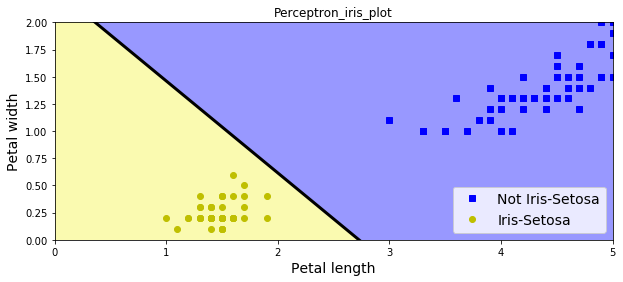

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.title("Perceptron_iris_plot")
plt.show()

# Activation Functions:

The operation of an artificial neural network is to sum up the product of the associated weight and the input signal and produce an output or activation function. For the input unit this activation function is the identity function.

In computational networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard computer chip circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input.

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

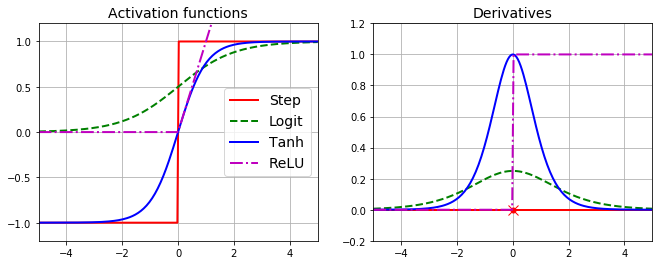

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

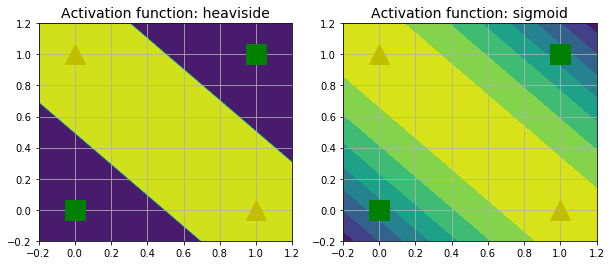

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Feed-forward Neural Network for MNIST using tf.learn

A feedforward neural network is an artificial neural network wherein connections between the units do not form a cycle. As such, it is different from recurrent neural networks. The feedforward neural network was the first and simplest type of artificial neural network devised.

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
import tensorflow as tf

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_master': '', '_save_checkpoints_steps': None, '_num_worker_replicas': 0, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_task_type': None, '_is_chief': True, '_save_summary_steps': 100, '_evaluation_master': '', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000004FCFA2B5F8>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None, '_num_ps_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by mov

C:\Users\Lohith\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lohith\AppData\Local\Temp\tmpke8dipqc\model.ckpt.
INFO:tensorflow:loss = 2.44836, step = 1
INFO:tensorflow:global_step/sec: 171.388
INFO:tensorflow:loss = 0.313371, step = 101 (0.576 sec)
INFO:tensorflow:global_step/sec: 201.174
INFO:tensorflow:loss = 0.290234, step = 201 (0.489 sec)
INFO:tensorflow:global_step/sec: 199.531
INFO:tensorflow:loss = 0.363063, step = 301 (0.501 sec)
INFO:tensorflow:global_step/sec: 177.13
INFO:tensorflow:loss = 0.237082, step = 401 (0.580 sec)
INFO:tensorflow:global_step/sec: 168.274
INFO:tensorflow:loss = 0.285541, step = 501 (0.586 se

INFO:tensorflow:global_step/sec: 181.492
INFO:tensorflow:loss = 0.00685896, step = 7701 (0.545 sec)
INFO:tensorflow:global_step/sec: 176.921
INFO:tensorflow:loss = 0.00785713, step = 7801 (0.555 sec)
INFO:tensorflow:global_step/sec: 200.717
INFO:tensorflow:loss = 0.0195101, step = 7901 (0.514 sec)
INFO:tensorflow:global_step/sec: 202.733
INFO:tensorflow:loss = 0.00140765, step = 8001 (0.493 sec)
INFO:tensorflow:global_step/sec: 178.319
INFO:tensorflow:loss = 0.00945373, step = 8101 (0.552 sec)
INFO:tensorflow:global_step/sec: 173.712
INFO:tensorflow:loss = 0.0177509, step = 8201 (0.577 sec)
INFO:tensorflow:global_step/sec: 173.204
INFO:tensorflow:loss = 0.0436538, step = 8301 (0.575 sec)
INFO:tensorflow:global_step/sec: 200.807
INFO:tensorflow:loss = 0.00783165, step = 8401 (0.492 sec)
INFO:tensorflow:global_step/sec: 202.81
INFO:tensorflow:loss = 0.00591637, step = 8501 (0.509 sec)
INFO:tensorflow:global_step/sec: 195.301
INFO:tensorflow:loss = 0.00454329, step = 8601 (0.512 sec)
INFO

INFO:tensorflow:global_step/sec: 165.697
INFO:tensorflow:loss = 0.000436356, step = 15901 (0.588 sec)
INFO:tensorflow:global_step/sec: 166.427
INFO:tensorflow:loss = 0.00590028, step = 16001 (0.609 sec)
INFO:tensorflow:global_step/sec: 189.361
INFO:tensorflow:loss = 0.00291672, step = 16101 (0.520 sec)
INFO:tensorflow:global_step/sec: 196.181
INFO:tensorflow:loss = 0.000168856, step = 16201 (0.510 sec)
INFO:tensorflow:global_step/sec: 190.173
INFO:tensorflow:loss = 0.00358613, step = 16301 (0.533 sec)
INFO:tensorflow:global_step/sec: 179.028
INFO:tensorflow:loss = 0.00204016, step = 16401 (0.559 sec)
INFO:tensorflow:global_step/sec: 200.792
INFO:tensorflow:loss = 0.00195818, step = 16501 (0.491 sec)
INFO:tensorflow:global_step/sec: 176.624
INFO:tensorflow:loss = 0.00293944, step = 16601 (0.582 sec)
INFO:tensorflow:global_step/sec: 173.903
INFO:tensorflow:loss = 0.00235864, step = 16701 (0.568 sec)
INFO:tensorflow:global_step/sec: 169.379
INFO:tensorflow:loss = 0.00257702, step = 16801 

INFO:tensorflow:global_step/sec: 199.639
INFO:tensorflow:loss = 0.00103975, step = 24001 (0.501 sec)
INFO:tensorflow:global_step/sec: 202.807
INFO:tensorflow:loss = 0.00065247, step = 24101 (0.493 sec)
INFO:tensorflow:global_step/sec: 203.34
INFO:tensorflow:loss = 0.00143107, step = 24201 (0.507 sec)
INFO:tensorflow:global_step/sec: 204.191
INFO:tensorflow:loss = 0.000176773, step = 24301 (0.490 sec)
INFO:tensorflow:global_step/sec: 200.241
INFO:tensorflow:loss = 0.00159652, step = 24401 (0.499 sec)
INFO:tensorflow:global_step/sec: 199.807
INFO:tensorflow:loss = 0.00101687, step = 24501 (0.485 sec)
INFO:tensorflow:global_step/sec: 200.715
INFO:tensorflow:loss = 0.000451171, step = 24601 (0.498 sec)
INFO:tensorflow:global_step/sec: 206.822
INFO:tensorflow:loss = 0.000988863, step = 24701 (0.499 sec)
INFO:tensorflow:global_step/sec: 196.906
INFO:tensorflow:loss = 0.00153896, step = 24801 (0.492 sec)
INFO:tensorflow:global_step/sec: 204.322
INFO:tensorflow:loss = 0.00127216, step = 24901 

INFO:tensorflow:global_step/sec: 199.967
INFO:tensorflow:loss = 0.000293523, step = 32101 (0.500 sec)
INFO:tensorflow:global_step/sec: 202.506
INFO:tensorflow:loss = 0.00106382, step = 32201 (0.494 sec)
INFO:tensorflow:global_step/sec: 206.733
INFO:tensorflow:loss = 0.000341635, step = 32301 (0.499 sec)
INFO:tensorflow:global_step/sec: 200.675
INFO:tensorflow:loss = 0.000214722, step = 32401 (0.498 sec)
INFO:tensorflow:global_step/sec: 200.642
INFO:tensorflow:loss = 0.000631533, step = 32501 (0.483 sec)
INFO:tensorflow:global_step/sec: 200.388
INFO:tensorflow:loss = 0.000130987, step = 32601 (0.499 sec)
INFO:tensorflow:global_step/sec: 207.176
INFO:tensorflow:loss = 0.0012527, step = 32701 (0.498 sec)
INFO:tensorflow:global_step/sec: 200.005
INFO:tensorflow:loss = 0.00110999, step = 32801 (0.484 sec)
INFO:tensorflow:global_step/sec: 200.549
INFO:tensorflow:loss = 0.000672002, step = 32901 (0.499 sec)
INFO:tensorflow:global_step/sec: 200.582
INFO:tensorflow:loss = 0.000667246, step = 33

DNNClassifier(params={'input_layer_min_slice_size': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000004FD3220C50>, 'optimizer': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'hidden_units': [300, 100], 'activation_fn': <function relu at 0x0000004FD04B61E0>, 'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),)})

In [12]:
from sklearn.metrics import accuracy_score

y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\Lohith\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Restoring parameters from C:\Users\Lohith\AppData\Local\Temp\tmpke8dipqc\model.ckpt-40000


0.98199999999999998

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = list(dnn_clf.predict_proba(X_test))
log_loss(y_test, y_pred_proba)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\Lohith\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Restoring parameters from C:\Users\Lohith\AppData\Local\Temp\tmpke8dipqc\model.ckpt-40000


0.071327592378331209

In [14]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


C:\Users\Lohith\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-05-31-09:17:38
INFO:tensorflow:Restoring parameters from C:\Users\Lohith\AppData\Local\Temp\tmpke8dipqc\model.ckpt-40000
INFO:tensorflow:Finished evaluation at 2017-05-31-09:17:39
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.982, global_step = 40000, loss = 0.0713274


{'accuracy': 0.98199999, 'global_step': 40000, 'loss': 0.071327396}

# Using Plain Tensorflow

In [15]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

In [16]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.78 Test accuracy: 0.8837
1 Train accuracy: 0.92 Test accuracy: 0.9072
2 Train accuracy: 0.86 Test accuracy: 0.918
3 Train accuracy: 0.98 Test accuracy: 0.9273
4 Train accuracy: 0.88 Test accuracy: 0.9306
5 Train accuracy: 0.96 Test accuracy: 0.936
6 Train accuracy: 0.94 Test accuracy: 0.9421
7 Train accuracy: 0.9 Test accuracy: 0.9441
8 Train accuracy: 0.98 Test accuracy: 0.9493
9 Train accuracy: 0.98 Test accuracy: 0.9522
10 Train accuracy: 1.0 Test accuracy: 0.9554
11 Train accuracy: 0.96 Test accuracy: 0.9556
12 Train accuracy: 0.98 Test accuracy: 0.9601
13 Train accuracy: 0.98 Test accuracy: 0.9613
14 Train accuracy: 0.96 Test accuracy: 0.9635
15 Train accuracy: 0.98 Test accuracy: 0.9644
16 Train accuracy: 0.98 Test accuracy: 0.9656
17 Train accuracy: 0.96 Test accuracy: 0.9663
18 Train accuracy: 1.0 Test accuracy: 0.9673
19 Train accuracy: 1.0 Test accuracy: 0.9694


In [18]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [19]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [20]:
show_graph(tf.get_default_graph())

# Using dense() instead of neuron_layer()

In [21]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.88 Test accuracy: 0.9054
1 Train accuracy: 0.92 Test accuracy: 0.9244
2 Train accuracy: 0.94 Test accuracy: 0.9339
3 Train accuracy: 0.92 Test accuracy: 0.9384
4 Train accuracy: 0.96 Test accuracy: 0.9438
5 Train accuracy: 0.92 Test accuracy: 0.9454
6 Train accuracy: 0.98 Test accuracy: 0.9514
7 Train accuracy: 0.98 Test accuracy: 0.9542
8 Train accuracy: 1.0 Test accuracy: 0.9563
9 Train accuracy: 0.94 Test accuracy: 0.9593
10 Train accuracy: 0.92 Test accuracy: 0.9595
11 Train accuracy: 0.94 Test accuracy: 0.9619
12 Train accuracy: 0.96 Test accuracy: 0.9645
13 Train accuracy: 0.98 Test accuracy: 0.9646
14 Train accuracy: 0.98 Test accuracy: 0.9674
15 Train accuracy: 0.98 Test accuracy: 0.9669
16 Train accuracy: 0.96 Test accuracy: 0.9689
17 Train accuracy: 1.0 Test accuracy: 0.9704
18 Train accuracy: 0.98 Test accuracy: 0.9716
19 Train accuracy: 0.96 Test accuracy: 0.9728


In [23]:
show_graph(tf.get_default_graph())